In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

--2022-05-02 21:24:13--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 104.21.67.193, 172.67.180.33, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|104.21.67.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip.1’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.03s   

2022-05-02 21:24:13 (37.5 MB/s) - ‘Mask_RCNN_basic_1.zip.1’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
replace Mask_RCNN/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN/.gitignore    
replace Mask_RCNN/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN/LICENSE       
replace Mask_RCNN/MANIFEST.in? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN/MANIFEST.in   
replace Mask_RCNN/mrcnn/config.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Mask_RCNN

In [ ]:
from google.colab import files
uploaded =  files.upload ()

Saving 2.jpg to 2 (1).jpg


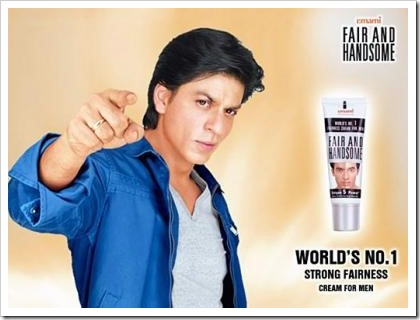

Loading weights from  /content/mask_rcnn_object_0005.h5


In [ ]:
# Load Image
img = cv2.imread("2.jpg")
cv2_imshow(img)
test_model, inference_config = load_inference_model(1, "/content/mask_rcnn_object_0005.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

In [ ]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        #cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], 0)


In [ ]:
test_model, inference_config = load_inference_model(1, "/content/mask_rcnn_object_0006.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)

Loading weights from  /content/mask_rcnn_object_0006.h5


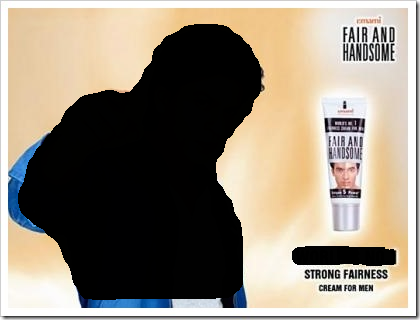

In [ ]:
from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        img = draw_mask(img, [cnt], 0)

cv2_imshow(img)